In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alliswell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alliswell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from string import digits

In [4]:
dataset=pd.read_csv('IPhoneReview.csv',encoding='latin-1')

In [5]:
dataset.head()

,No,Date,Review,UserName
0,0,16-Jan-18,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No
1,1,16-Jan-18,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous
2,2,16-Jan-18,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous
3,3,16-Jan-18,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony
4,4,16-Jan-18,hey guys iam confused between buying iphone x ...,Anonymous


In [6]:
dataset=dataset.drop(['No','Date','UserName'],axis=1)
dataset.head()

,Review
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea..."
1,This month it fell from 1149Â? to 999Â? in Ger...
2,"chopp, 16 Jan 2018hey guys iam confused betwee..."
3,"chopp, 16 Jan 2018hey guys iam confused betwee..."
4,hey guys iam confused between buying iphone x ...


In [7]:
dataset.dtypes

Review    object
dtype: object

In [8]:
dataset['word_count']=dataset['Review'].apply(lambda x:len(str(x).split(" ")))
dataset[['Review','word_count']].head()

,Review,word_count
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",23
1,This month it fell from 1149Â? to 999Â? in Ger...,17
2,"chopp, 16 Jan 2018hey guys iam confused betwee...",19
3,"chopp, 16 Jan 2018hey guys iam confused betwee...",38
4,hey guys iam confused between buying iphone x ...,15


In [9]:
dataset['char_count']=dataset['Review'].str.len()
dataset[['Review','char_count']].head()

,Review,char_count
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",120
1,This month it fell from 1149Â? to 999Â? in Ger...,96
2,"chopp, 16 Jan 2018hey guys iam confused betwee...",100
3,"chopp, 16 Jan 2018hey guys iam confused betwee...",203
4,hey guys iam confused between buying iphone x ...,78


In [10]:
dataset['stopwords']=dataset['Review'].apply(lambda x: len([x for x in x.split() if x in stopwords.words('english')]))
dataset[['Review','stopwords']].head()

,Review,stopwords
0,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",2
1,This month it fell from 1149Â? to 999Â? in Ger...,5
2,"chopp, 16 Jan 2018hey guys iam confused betwee...",2
3,"chopp, 16 Jan 2018hey guys iam confused betwee...",9
4,hey guys iam confused between buying iphone x ...,2


In [11]:
dataset['R']=dataset['Review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
dataset['R'].head()

0    mir, 16 jan 2018my huawei mate 10 pro is alrea...
1    this month it fell from 1149â? to 999â? in ger...
2    chopp, 16 jan 2018hey guys iam confused betwee...
3    chopp, 16 jan 2018hey guys iam confused betwee...
4    hey guys iam confused between buying iphone x ...
Name: R, dtype: object

In [12]:
dataset['Re']=dataset['R'].str.replace('[^\w\s]','')
dataset['Re'].head()

0    mir 16 jan 2018my huawei mate 10 pro is alread...
1    this month it fell from 1149â to 999â in germa...
2    chopp 16 jan 2018hey guys iam confused between...
3    chopp 16 jan 2018hey guys iam confused between...
4    hey guys iam confused between buying iphone x ...
Name: Re, dtype: object

In [13]:
dataset['Rev']=dataset['Re'].apply(lambda x:" ".join(x for x in x.split() if x not in stopwords.words('english')))
dataset['Rev'].head()

0    mir 16 jan 2018my huawei mate 10 pro already t...
1    month fell 1149â 999â germany via resellers ho...
2    chopp 16 jan 2018hey guys iam confused buying ...
3    chopp 16 jan 2018hey guys iam confused buying ...
4    hey guys iam confused buying iphone x huawei y...
Name: Rev, dtype: object

In [14]:
a=dataset['Rev'].values
a

array(['mir 16 jan 2018my huawei mate 10 pro already two weeks old feel android os getting super laggy sho moreno',
       'month fell 1149â 999â germany via resellers hoping continues like',
       'chopp 16 jan 2018hey guys iam confused buying iphone x huawei y3 2017 please help plel',
       ...,
       'headphone jack ppi 500 flagship wtf copying samsungs infinity display',
       'fingerprint sensor',
       'samsung making screen super amoled super retina'], dtype=object)

In [15]:
def txt(a):
    string=" "
    for i in a:
        string+=i
    return string
print(txt(a))

 mir 16 jan 2018my huawei mate 10 pro already two weeks old feel android os getting super laggy sho morenomonth fell 1149â 999â germany via resellers hoping continues likechopp 16 jan 2018hey guys iam confused buying iphone x huawei y3 2017 please help plelchopp 16 jan 2018hey guys iam confused buying iphone x huawei y3 2017 please help pits like buying kia mercedes decide price difference performance coursehey guys iam confused buying iphone x huawei y3 2017 please help pmir 16 jan 2018my huawei mate 10 pro already two weeks old feel android os getting super laggy sho moreyes buy best phone timekavorka1 11 jan 2018does anyone battery issues ios 1122not really wen start u cant fixhuawei mate 10 pro already two weeks old feel android os getting super laggy buy amazing iphone xface idhigh resolution audio phone x fingerprint audio jackanonymous 13 jan 2018i dont like apple non customisable trying like android iphone customisable android cant f iphone except apple want samsung want withou

In [16]:
remove_num=str.maketrans('','',digits)
r=txt(a).translate(remove_num)
r

' mir  jan my huawei mate  pro already two weeks old feel android os getting super laggy sho morenomonth fell â â germany via resellers hoping continues likechopp  jan hey guys iam confused buying iphone x huawei y  please help plelchopp  jan hey guys iam confused buying iphone x huawei y  please help pits like buying kia mercedes decide price difference performance coursehey guys iam confused buying iphone x huawei y  please help pmir  jan my huawei mate  pro already two weeks old feel android os getting super laggy sho moreyes buy best phone timekavorka  jan does anyone battery issues ios not really wen start u cant fixhuawei mate  pro already two weeks old feel android os getting super laggy buy amazing iphone xface idhigh resolution audio phone x fingerprint audio jackanonymous  jan i dont like apple non customisable trying like android iphone customisable android cant f iphone except apple want samsung want without restriction rd partymashroor  jan yeah sameyeahthink loads issues 

In [17]:
tokens=word_tokenize(r)
tokens[:20]

['mir',
 'jan',
 'my',
 'huawei',
 'mate',
 'pro',
 'already',
 'two',
 'weeks',
 'old',
 'feel',
 'android',
 'os',
 'getting',
 'super',
 'laggy',
 'sho',
 'morenomonth',
 'fell',
 'â']

In [18]:
tokens_n=[word for word in tokens if word not in stopwords.words('english')]
tokens_n[:20]

['mir',
 'jan',
 'huawei',
 'mate',
 'pro',
 'already',
 'two',
 'weeks',
 'old',
 'feel',
 'android',
 'os',
 'getting',
 'super',
 'laggy',
 'sho',
 'morenomonth',
 'fell',
 'â',
 'â']

In [19]:
count_freq=Counter(tokens_n)
count_freq

Counter({'mir': 1,
         'jan': 65,
         'huawei': 14,
         'mate': 25,
         'pro': 19,
         'already': 75,
         'two': 47,
         'weeks': 6,
         'old': 93,
         'feel': 52,
         'android': 410,
         'os': 28,
         'getting': 39,
         'super': 86,
         'laggy': 13,
         'sho': 2,
         'morenomonth': 1,
         'fell': 2,
         'â': 16,
         'germany': 5,
         'via': 5,
         'resellers': 1,
         'hoping': 10,
         'continues': 4,
         'likechopp': 1,
         'hey': 14,
         'guys': 68,
         'iam': 3,
         'confused': 11,
         'buying': 45,
         'iphone': 1562,
         'x': 918,
         'please': 38,
         'help': 14,
         'plelchopp': 1,
         'pits': 1,
         'like': 508,
         'kia': 4,
         'mercedes': 7,
         'decide': 8,
         'price': 188,
         'difference': 53,
         'performance': 52,
         'coursehey': 1,
         'pmir': 1,
    

In [20]:
most_freq=count_freq.most_common(20)
most_freq

[('iphone', 1562),
 ('apple', 1017),
 ('x', 918),
 ('phone', 822),
 ('samsung', 516),
 ('like', 508),
 ('android', 410),
 ('screen', 405),
 ('sep', 363),
 ('dont', 325),
 ('nov', 320),
 ('better', 296),
 ('one', 273),
 ('people', 267),
 ('note', 259),
 ('buy', 258),
 ('even', 257),
 ('best', 256),
 ('display', 246),
 ('get', 233)]

In [21]:
string=" "
for word,freq in most_freq:
    string=string+" "+word   

In [22]:
wordcloud_est=WordCloud(width=800,height=800,min_font_size=10)
wordcloud=wordcloud_est.generate(string)

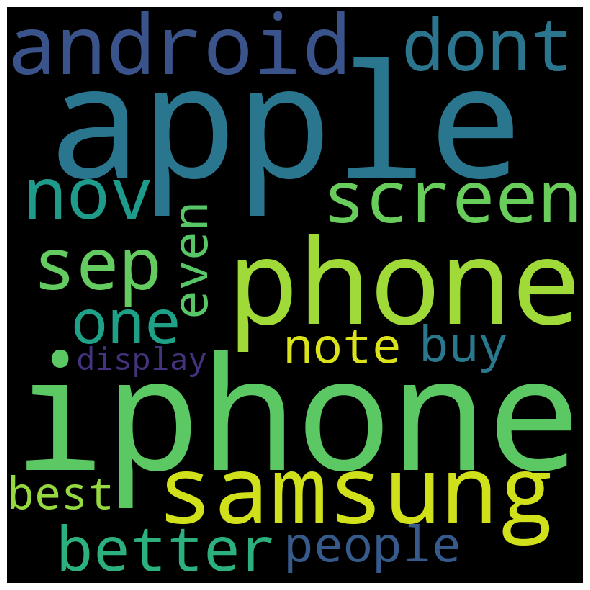

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)